# Experimenting with Autoencoder(s) on MNIST

The purpose of this notebook is to explore a recent architecture for representation learning, by building and training an autoencoder on MNIST data.

An autoencoder is a neural network architecture that consists of an encoder and a decoder. The encoder transforms the ANN inputs into hidden layer outputs. Traditionally, the hidden layer is a bottleneck, meaning its dimension is (much) smaller than the dimensions of the input layer. This allows the network to learn a consice representation of the input data. Recently, autoencoders with much larger hidden layers have proven useful for learning features that are useful for pretraining ANNs. These are called sparse autoencoders, and require imposition of a sparsity constraint to prevent the ANN from learning an over-fit representation.

Classical autoencoders have one main problem that limits their practical application. Namely, the mapping between the feature vector and the latent space may not be continuous. This can create unexpected results when attempting to generate variations of an output by manipulating the decoder's latent vector input. Ideally, we would like to sample from a latent space distribution for a particular class of output. However, with a classical autoencoder, we can unwittingly generate samples of a different output class because we've crossed some unforeseen latent space discontinuity.

Variational autoencoders solve this problem by forcing the latent space to be continuous by design. Mathematically, this is done by adding a latent loss term to the standard mean square error loss. The latent loss is the Kullback-Leibler divergence, which allows us to measure the departure of the latent vector distribution from the unit Gaussian. This latent loss term coaxes the network into learning "nice" Gaussian distributions for the latent feature vectors from each input class. To implement this, the encoder architecture is changed to output a stacked vector of means $\mu$ and standard deviations $\sigma$, which are then used to sample the actual output of the encoder. Thus even for the same input, the encoder will product slightly different outputs. The decoder is trained on this output vectora as before.

Reproduce latent space visualizations found [here](https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf) and [here](https://blog.keras.io/building-autoencoders-in-keras.html).

## Imports and Initialize Matplotlib Defaults

Let's start by loading and visualizing a sample of the MNIST dataset provided by Keras. It is already split into 60k training and 10k test images. We'll combine them since we're only interested in generating new images of digits.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

%matplotlib inline
plt.style.use('seaborn-ticks')

Using TensorFlow backend.


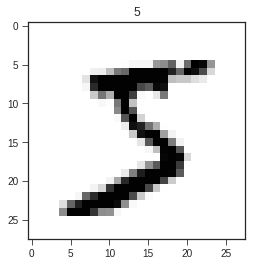

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = np.append(X_train, X_test, axis=0)
y = np.append(y_train, y_test, axis=0)

plt.imshow(X[0])
plt.title(y[0])
plt.show()

In [5]:
def display_images(data, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols,
                             sharex=True, sharey=True,
                             figsize=[ncols, nrows])
    axes = [a for aa in axes for a in aa]
    for ii, dat in enumerate(data):
        a = axes[ii]
        plt.sca(a)
        plt.imshow(dat)
        a.axis('off')

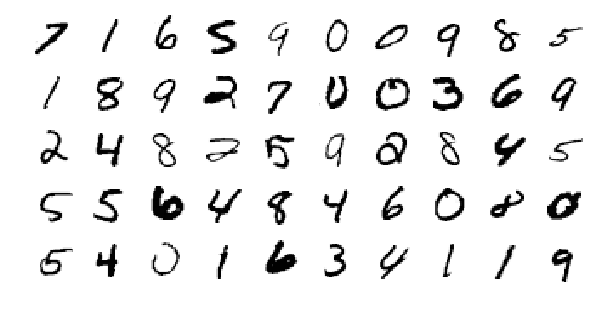

In [6]:
display_images(X[np.random.choice(len(X), 50, replace=False)], nrows=5, ncols=10)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model